<a href="https://colab.research.google.com/github/dwishintya/fotomataikan/blob/main/Training_Kesegaran_Ikan_Bandeng_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install subversion > /dev/null
!svn export  https://github.com/dwishintya/fotomataikan/trunk/data > /dev/null

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # The %tensorflow_version magic only works in colab.
  %tensorflow_version 2.x
except Exception:
  pass
import numpy as np 
import math, os, sys
import itertools

import matplotlib.pyplot as plt
plt.style.use('default')
from scipy import ndimage

from skimage import measure, morphology
from skimage.io import imsave, imread
from skimage.filters import threshold_otsu
from skimage.transform import resize

import tensorflow as tf
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
import pip
from keras.preprocessing.image import img_to_array
from PIL import Image as pil_image
from PIL import ImagePath
from PIL import ImageShow
from keras.preprocessing.image import load_img

In [ ]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras import layers
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split

In [ ]:
#Memuat semua gambar ke memori untuk pertama kali

#Memuat dataset pelatihan
IMAGE_SIZE = 25
BATCH_SIZE = 60
base_dir = os.path.join('data/mata_ikan/train')

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255) 
    #validation_split=0.2)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(25,25),
    batch_size=BATCH_SIZE,
    subset='training')

#val_generator = datagen.flow_from_directory(
 #   base_dir,
  #  target_size=(25,25),
   # batch_size=BATCH_SIZE,
   # subset='validation')

#Memuat dataset pengujian
X_test = []
y_test = []
labels = ['SEGAR', 'TIDAK_SEGAR']

for i,label in enumerate(labels):
    folder = os.path.join("data/mata_ikan/test",label)
    files = sorted(os.listdir(folder))
    files = [x for x in files if x.endswith(".jpg")]
    for k,file in enumerate(files):
        image_path = os.path.join(folder, file)
        
        image = imread(image_path)/255.
        image = resize(image,(25,25))
        X_test.append(image)
        category = os.path.split(folder)[-1]
        y_test.append(i)

X_test = np.array(X_test)
y_test = np.array(y_test)

#Menampilkan bentuk dari masing-masing dataset
for image_batch, label_batch in train_generator:
  break
print("Bentuk array dari dataset train (pelatihan) adalah:", image_batch.shape,label_batch.shape)
#for image_batch, label_batch in val_generator:
 # break
#print("Bentuk array dari dataset validation (validasi) adalah:", image_batch.shape,label_batch.shape)
print("Bentuk array dari dataset test (pengujian) adalah:", X_test.shape,y_test.shape)

Found 60 images belonging to 2 classes.
Bentuk array dari dataset train (pelatihan) adalah: (60, 25, 25, 3) (60, 2)
Bentuk array dari dataset test (pengujian) adalah: (12, 25, 25, 3) (12,)


In [ ]:
print (train_generator.class_indices)

labels_txt = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels_txt)

{'SEGAR': 0, 'TIDAK_SEGAR': 1}


In [ ]:
#Perintah di bawah ini untuk melihat list bagian dari file yang sudah diunduh dari Github
!ls data/mata_ikan
!ls data/mata_ikan/train
!ls data/mata_ikan/train/SEGAR
!ls data/mata_ikan/train/TIDAK_SEGAR

test  train
SEGAR  TIDAK_SEGAR
'A (10).jpg'  'A (2).jpg'   'B (16).jpg'  'B (4).jpg'	'C (35).jpg'
'A (11).jpg'  'A (3).jpg'   'B (17).jpg'  'B (5).jpg'	'C (36).jpg'
'A (15).jpg'  'A (7).jpg'   'B (25).jpg'  'C (23).jpg'	'C (39).jpg'
'A (20).jpg'  'A (9).jpg'   'B (2).jpg'   'C (24).jpg'	'C (40).jpg'
'A (21).jpg'  'B (12).jpg'  'B (30).jpg'  'C (27).jpg'	'C (47).jpg'
'A (22).jpg'  'B (13).jpg'  'B (34).jpg'  'C (34).jpg'	'C (48).jpg'
'D (38).jpg'  'D (69).jpg'  'E (28).jpg'  'E (7).jpg'	'F (52).jpg'
'D (47).jpg'  'D (70).jpg'  'E (2).jpg'   'E (8).jpg'	'F (5).jpg'
'D (48).jpg'  'D (73).jpg'  'E (31).jpg'  'F (27).jpg'	'F (6).jpg'
'D (55).jpg'  'D (74).jpg'  'E (32).jpg'  'F (29).jpg'	'F (7).jpg'
'D (59).jpg'  'E (1).jpg'   'E (35).jpg'  'F (32).jpg'	'F (8).jpg'
'D (68).jpg'  'E (27).jpg'  'E (4).jpg'   'F (42).jpg'	'F (9).jpg'


In [ ]:
y_test2 = to_categorical(y_test)
X_test3, y_test3 = (X_test, y_test2)

In [ ]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation ='relu',input_shape =(25,25,3),name="layer1"),
                                    tf.keras.layers.MaxPool2D((2,2),name="max1"),
                                    #
                                   # tf.keras.layers.Conv2D(1,(3,3),activation='relu',name="layer2"),
                                    #tf.keras.layers.MaxPool2D((2,2),name="max2"),
                                   #
                                    tf.keras.layers.Conv2D(2,(3,3),activation='relu',name="layer3"),
                                    tf.keras.layers.MaxPool2D((2,2),name="max3"),
                                    #
                                    #tf.keras.layers.Conv2D(2,(3,3),activation='relu',name="layer4"),
                                    #tf.keras.layers.MaxPool2D((2,2),name="max4"),

                                    tf.keras.layers.Flatten(name="flat"),
                                   #
                                  # tf.keras.layers.Dense(2,activation='relu',name="dense1"),
                                    ###
                                  tf.keras.layers.Dense(16,use_bias=False,activation='relu',name="dense1"),
                                  
                                 tf.keras.layers.Dense(2,use_bias=False,activation='softmax',name="dense2")
                                    ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Conv2D)             (None, 23, 23, 16)        448       
                                                                 
 max1 (MaxPooling2D)         (None, 11, 11, 16)        0         
                                                                 
 layer3 (Conv2D)             (None, 9, 9, 2)           290       
                                                                 
 max3 (MaxPooling2D)         (None, 4, 4, 2)           0         
                                                                 
 flat (Flatten)              (None, 32)                0         
                                                                 
 dense1 (Dense)              (None, 16)                512       
                                                                 
 dense2 (Dense)              (None, 2)                

In [ ]:
for layer in model.layers:
    print(layer.name, layer)

layer1 <keras.layers.convolutional.Conv2D object at 0x7fad8b71b250>
max1 <keras.layers.pooling.MaxPooling2D object at 0x7fad03744050>
layer3 <keras.layers.convolutional.Conv2D object at 0x7facf9630e50>
max3 <keras.layers.pooling.MaxPooling2D object at 0x7facf95b7210>
flat <keras.layers.core.flatten.Flatten object at 0x7facf95b76d0>
dense1 <keras.layers.core.dense.Dense object at 0x7facf95b7790>
dense2 <keras.layers.core.dense.Dense object at 0x7facf95b7b10>


In [ ]:
print(model.layers[0].weights)
print(model.layers[0].bias.numpy())
print(model.layers[0].bias_initializer)

In [ ]:
weight = model.get_weights()
weight

[array([[[[-1.21361203e-01,  1.23450130e-01,  1.07164592e-01,
           -1.05143540e-01,  6.82001710e-02, -1.01043276e-01,
            8.62910748e-02,  1.85632408e-01,  1.78362548e-01,
           -1.14857472e-01, -1.38297483e-01, -3.16224694e-02,
            4.70097661e-02,  4.69758213e-02, -8.48490596e-02,
            1.53596491e-01],
          [ 8.31131339e-02, -1.64100945e-01,  4.64363247e-02,
           -7.79228061e-02,  1.40701234e-03, -1.50783673e-01,
           -1.51675180e-01,  8.74579251e-02,  1.24098778e-01,
            1.63759023e-01, -2.08160132e-02, -1.62898690e-01,
           -1.36196673e-01, -8.04447457e-02,  9.60936546e-02,
           -1.46425903e-01],
          [-1.75802261e-02,  1.34507865e-01,  4.91658002e-02,
           -5.65643013e-02,  3.04223597e-02,  8.75682533e-02,
           -9.83747095e-02,  9.31964815e-02,  4.94028628e-02,
            4.12550718e-02, -1.25655875e-01, -1.90978199e-02,
           -1.10302299e-01, -4.11363989e-02, -7.88784772e-02,
           -

In [ ]:
#(learning_rate=0.001)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model_fit = model.fit(train_generator,
                       steps_per_epoch =1,
                       epochs= 500
                     )

Epoch 1/500
1/1 [==============================] - 9s 9s/step - loss: 0.6973 - accuracy: 0.4833
Epoch 2/500
1/1 [==============================] - 9s 9s/step - loss: 0.6955 - accuracy: 0.4833
Epoch 3/500
1/1 [==============================] - 9s 9s/step - loss: 0.6937 - accuracy: 0.5167
Epoch 4/500
1/1 [==============================] - 9s 9s/step - loss: 0.6926 - accuracy: 0.5000
Epoch 5/500
1/1 [==============================] - 9s 9s/step - loss: 0.6924 - accuracy: 0.4833
Epoch 6/500
1/1 [==============================] - 9s 9s/step - loss: 0.6920 - accuracy: 0.4333
Epoch 7/500
1/1 [==============================] - 9s 9s/step - loss: 0.6916 - accuracy: 0.4333
Epoch 8/500
1/1 [==============================] - 9s 9s/step - loss: 0.6910 - accuracy: 0.4833
Epoch 9/500
1/1 [==============================] - 9s 9s/step - loss: 0.6901 - accuracy: 0.5000
Epoch 10/500
1/1 [==============================] - 9s 9s/step - loss: 0.6890 - accuracy: 0.5167
Epoch 11/500
1/1 [=====================

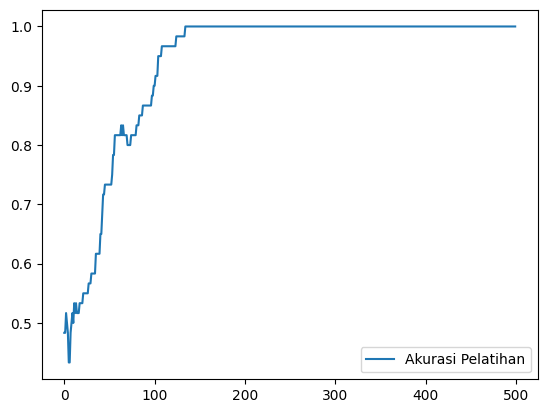

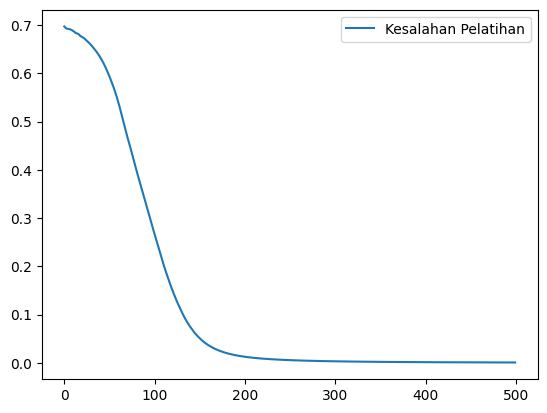

In [ ]:
plt.plot(model_fit.history["accuracy"],label="Akurasi Pelatihan")
#plt.plot(model_fit.history["val_accuracy"],label="Validasi Akurasi")
plt.legend()
plt.show()

plt.plot(model_fit.history["loss"],label="Kesalahan Pelatihan")
#plt.plot(model_fit.history["val_loss"],label="Validasi Kesalahan")
plt.legend()
plt.show()

In [ ]:
kelas = model.predict(val_generator)
print(kelas)

[[9.99999762e-01 1.87837557e-07]
 [9.99305367e-01 6.94656919e-04]
 [9.99998569e-01 1.44523392e-06]
 [9.99740303e-01 2.59733381e-04]
 [1.86292731e-04 9.99813735e-01]
 [2.24490912e-10 1.00000000e+00]
 [3.80011471e-08 1.00000000e+00]
 [1.16143515e-02 9.88385677e-01]
 [8.41663629e-02 9.15833592e-01]
 [1.13184482e-03 9.98868227e-01]
 [9.99999404e-01 6.20491505e-07]
 [9.99681592e-01 3.18414852e-04]
 [1.00000000e+00 3.88654398e-09]
 [3.04452840e-07 9.99999642e-01]
 [1.18007406e-03 9.98819888e-01]
 [9.99999762e-01 2.55415955e-07]]


In [ ]:
print(val_generator.filenames)

['SEGAR/B1.jpg', 'SEGAR/B10.jpg', 'SEGAR/B11.jpg', 'SEGAR/B12.jpg', 'SEGAR/B13.jpg', 'SEGAR/B14.jpg', 'SEGAR/B15.jpg', 'SEGAR/B16.jpg', 'TIDAK_SEGAR/F1.jpg', 'TIDAK_SEGAR/F10.jpg', 'TIDAK_SEGAR/F11.jpg', 'TIDAK_SEGAR/F12.jpg', 'TIDAK_SEGAR/F13.jpg', 'TIDAK_SEGAR/F14.jpg', 'TIDAK_SEGAR/F15.jpg', 'TIDAK_SEGAR/F16.jpg']


In [ ]:
#Prediksi Label Validasi dengan Pelatihan
n = 0

input_image = image_batch[n][np.newaxis,...]
print("Labelnya adalah: ", label_batch[n])

predictions = model.predict(input_image)
print("Prediksinya adalah",predictions[0])

Labelnya adalah:  [0. 1.]
Prediksinya adalah [6.318613e-12 1.000000e+00]


In [ ]:
#Memeriksa matriks model
print(model.metrics_names)
#Evaluasi data test
print(model.evaluate(x= X_test3, y = y_test3))

#y_test2 = to_categorical(y_test)
#X_test3, y_test3 = (X_test, y_test2)

['loss', 'accuracy']
1/1 [==============================] - 0s 171ms/step - loss: 0.2738 - accuracy: 0.9167
[0.2737971246242523, 0.9166666865348816]


In [ ]:
#Menampilkan matriks yang benar dan matriks hasil prediksi

#Label yang benar
y_true = np.argmax(y_test2,axis=1)

#Label prediksi
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print(y_true)
print(y_pred)

[0 0 0 0 0 0 1 1 1 1 1 1]
[0 0 0 0 1 0 1 1 1 1 1 1]


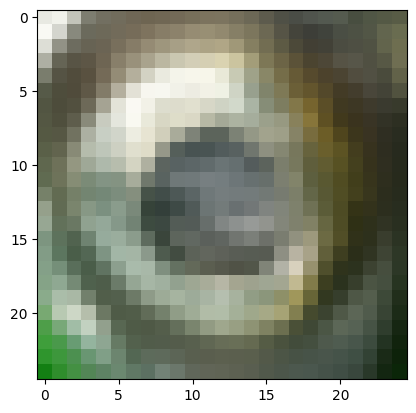

Label yang benar adalah: 1 : TIDAK_SEGAR
Nilai yang diprediksi adalah: [1.52e-10 1.00e+00]
Label yang diprediksi adalah: 1 : TIDAK_SEGAR
Prediksi benar


In [ ]:
n = 11 #Jangan melampaui (nilai dari gambar test - 1)

plt.imshow(X_test[n])
plt.show()


true_label = np.argmax(y_test2,axis=1)[n]
print("Label yang benar adalah:",true_label,":",labels[true_label])
prediction = model.predict(X_test[n][np.newaxis,...])[0]
print("Nilai yang diprediksi adalah:",prediction)
predicted_label = np.argmax(prediction)
print("Label yang diprediksi adalah:",predicted_label,":",labels[predicted_label])
if true_label == predicted_label:
    print("Prediksi benar")
else:
    print("Prediksi salah")

In [ ]:
print(val_generator.filenames)

['SEGAR/B1.jpg', 'SEGAR/B10.jpg', 'SEGAR/B11.jpg', 'SEGAR/B12.jpg', 'SEGAR/B13.jpg', 'SEGAR/B14.jpg', 'SEGAR/B15.jpg', 'SEGAR/B16.jpg', 'TIDAK_SEGAR/F1.jpg', 'TIDAK_SEGAR/F10.jpg', 'TIDAK_SEGAR/F11.jpg', 'TIDAK_SEGAR/F12.jpg', 'TIDAK_SEGAR/F13.jpg', 'TIDAK_SEGAR/F14.jpg', 'TIDAK_SEGAR/F15.jpg', 'TIDAK_SEGAR/F16.jpg']


Normalized confusion matrix
[[0.83 0.17]
 [0.   1.  ]]


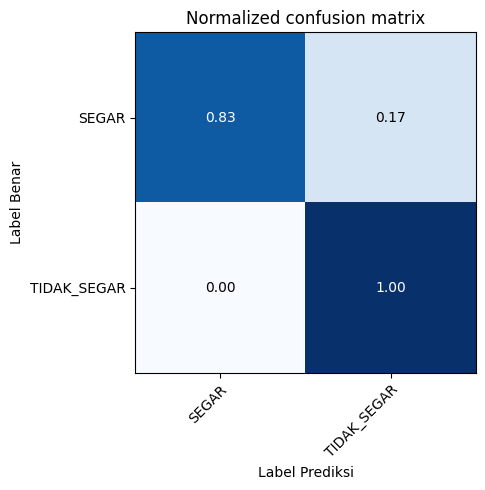

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    #ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Label Benar',
           xlabel='Label Prediksi')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

plot_confusion_matrix(y_true, y_pred, classes=labels, normalize=True,
                      title='Normalized confusion matrix')

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_true, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_true, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_true, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_true, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.916667
Precision: 0.857143
Recall: 1.000000
F1 score: 0.923077


In [ ]:
weight = model.get_weights()
weight

[array([[[[-2.45e-01, -1.17e-02,  1.99e-01, -1.04e-01, -1.95e-02,
           -1.10e-01,  8.42e-02,  3.69e-01,  3.12e-01, -1.20e-01,
            7.45e-02, -8.35e-02, -1.09e-01,  2.07e-02,  6.95e-02,
            1.47e-01],
          [-4.15e-02, -2.96e-01,  1.39e-01, -1.55e-02, -1.13e-01,
           -1.60e-01, -1.53e-01,  2.65e-01,  2.83e-01,  1.59e-01,
            1.54e-01, -2.30e-01, -3.03e-01, -8.10e-02,  2.58e-01,
           -1.73e-01],
          [-1.03e-01,  6.96e-03,  1.30e-01,  1.45e-01, -1.35e-01,
            7.80e-02, -1.02e-01,  2.76e-01,  2.17e-01,  3.65e-02,
           -2.79e-01, -1.46e-01, -2.97e-01, -1.26e-01,  3.85e-02,
           -1.62e-01]],
 
         [[-2.08e-01, -3.49e-01, -5.78e-02, -2.34e-02, -2.25e-01,
           -1.42e-01, -6.06e-02, -1.03e-02,  1.45e-01,  1.68e-01,
            3.22e-01, -1.25e-01, -3.51e-01,  3.60e-01,  1.65e-01,
            4.03e-02],
          [-2.98e-01, -3.60e-01,  1.55e-01, -1.13e-01, -1.30e-02,
            5.50e-02, -1.58e-01, -1.85e-01,  9.

In [ ]:
import numpy as np
from PIL import Image
from keras.preprocessing import image
image = Image.open('/content/C (43).jpg')
new_image = image.resize((25, 25))
new_image.save('c43.jpg')

In [ ]:
from PIL import Image
im = Image.open('/content/c43.jpg' ,'r')
pixel_values = list(im.getdata())
pixel_values

[(100, 103, 82),
 (112, 115, 94),
 (128, 130, 108),
 (136, 135, 114),
 (129, 127, 104),
 (121, 116, 94),
 (132, 128, 103),
 (154, 149, 127),
 (205, 200, 178),
 (214, 212, 191),
 (225, 224, 204),
 (224, 225, 207),
 (212, 216, 199),
 (201, 208, 192),
 (201, 209, 194),
 (204, 215, 199),
 (218, 217, 197),
 (215, 214, 194),
 (190, 189, 171),
 (170, 171, 153),
 (170, 171, 153),
 (156, 159, 142),
 (143, 147, 130),
 (154, 161, 145),
 (167, 174, 158),
 (107, 112, 90),
 (140, 143, 122),
 (121, 125, 102),
 (115, 117, 95),
 (157, 157, 133),
 (166, 164, 141),
 (179, 174, 152),
 (237, 232, 210),
 (205, 200, 178),
 (191, 189, 168),
 (169, 168, 148),
 (141, 142, 124),
 (117, 120, 103),
 (105, 112, 94),
 (116, 125, 108),
 (131, 140, 123),
 (168, 167, 147),
 (222, 221, 201),
 (230, 229, 211),
 (178, 179, 161),
 (136, 137, 119),
 (122, 125, 108),
 (131, 135, 118),
 (154, 158, 143),
 (182, 189, 173),
 (137, 142, 120),
 (171, 176, 154),
 (144, 147, 126),
 (126, 128, 106),
 (177, 176, 155),
 (189, 187, 166)

In [ ]:
from PIL import Image
im = Image.open('/content/C (43).jpg' ,'r')
pixel_values = list(im.getdata())
pixel_values

[(82, 91, 46),
 (81, 90, 45),
 (82, 91, 46),
 (82, 91, 46),
 (80, 89, 44),
 (81, 90, 45),
 (80, 89, 44),
 (78, 87, 42),
 (79, 88, 43),
 (77, 86, 41),
 (78, 87, 42),
 (80, 89, 44),
 (81, 90, 45),
 (82, 91, 46),
 (84, 93, 48),
 (83, 92, 47),
 (81, 90, 45),
 (80, 89, 44),
 (79, 88, 43),
 (78, 87, 42),
 (76, 85, 40),
 (76, 85, 40),
 (75, 84, 39),
 (73, 82, 37),
 (72, 81, 36),
 (73, 82, 37),
 (73, 82, 37),
 (73, 82, 39),
 (73, 82, 39),
 (74, 83, 40),
 (75, 84, 41),
 (74, 83, 40),
 (75, 84, 41),
 (75, 84, 41),
 (76, 85, 42),
 (77, 86, 43),
 (78, 87, 44),
 (79, 88, 45),
 (78, 87, 44),
 (78, 87, 44),
 (77, 86, 43),
 (77, 86, 43),
 (77, 86, 43),
 (77, 86, 43),
 (77, 86, 43),
 (76, 85, 42),
 (76, 85, 42),
 (76, 85, 42),
 (74, 83, 40),
 (72, 81, 38),
 (71, 80, 37),
 (72, 81, 38),
 (74, 83, 40),
 (74, 83, 40),
 (74, 83, 40),
 (73, 82, 39),
 (72, 81, 38),
 (70, 79, 36),
 (70, 79, 36),
 (72, 81, 38),
 (73, 82, 39),
 (74, 83, 40),
 (74, 83, 40),
 (72, 81, 38),
 (74, 83, 40),
 (71, 80, 37),
 (71, 80, 

In [ ]:
!pip install xlsxwriter

     |████████████████████████████████| 149 kB 5.5 MB/s 


In [ ]:

import xlsxwriter
from PIL import Image
import sys

def toHexa(val, channel):
    """
    Convert decimal value to hexadecimal color code where
    only channel given has a value and the other two are set
    to 00.
    val: decimal value
    channel: color channel
    """

    if channel == 'r':  
        return '#' + '{:02x}'.format(val) + '0000'
    elif channel == 'g':
        return '#00' + '{:02x}'.format(val) + '00'
    else:
        return '#0000' + '{:02x}'.format(val)


def main():

    if len(sys.argv) < 2:
        sys.exit()
    # load image
    image = Image.open('/content/c43.jpg')
   #image = resize(image,(25,25))
    imsize = (25,25)
    print(f'Input image size: ({imsize[0]}, {imsize[1]})')
    if imsize[0] > 128 or imsize[1] > 128:
        print('Downsampling image.')
        im.thumbnail((128,128), Image.ANTIALIAS) # downsampling, aspect ratio stays the same
        imsize = im.size
        print(f'Image size after downsampling: ({imsize[0]}, {imsize[1]})')
    pix = im.load()
    
    # create excel workbook/worksheet
    workbook = xlsxwriter.Workbook( './gamb.xls')
    worksheet = workbook.add_worksheet('image')

    # color excel cells
    for x in range(imsize[0]):
        for y in range(0, imsize[1]*3, 3):
            colors = pix[x, y/3]
            for i,channel in enumerate(['r','g','b']):
                hexcode = toHexa(colors[i], channel=channel)
                wbformat = workbook.add_format({'bg_color':hexcode})
                worksheet.write(y+i,x,colors[i], wbformat)

    workbook.close()
    print('Spreadsheet complete. Saved to ./output.xls')

if __name__ == '__main__':
    main()

Input image size: (25, 25)
Spreadsheet complete. Saved to ./output.xls


In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/bismillah.jpg', target_size = (25,25))
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)

train_generator.class_indices
if result[0][0] == 1:
  prediction ='SEGAR'
else:
  prediction ='TIDAK SEGAR'
print(result)
print(prediction)

In [ ]:
!cat labels.txt

SEGAR
TIDAK_SEGAR

In [ ]:
saved_model_dir = 'save/model'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('Klasifikasi_kesegaran_ikan41222.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: save/model/assets
